# Implementation of RNN in stock data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('GOOG.csv')

In [3]:
dataset.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,778.809998,789.630005,775.799988,786.140015,786.140015,1657300
1,2017-01-04,788.359985,791.340027,783.159973,786.900024,786.900024,1073000
2,2017-01-05,786.080017,794.479980,785.020020,794.020020,794.020020,1335200


In [4]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataset, test_size=0.03,shuffle = False)

In [5]:
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(training_set)
training_set

array([[0.        ],
       [0.01725662],
       [0.01313677],
       [0.02972482],
       [0.04985459],
       [0.05249271],
       [0.04732477],
       [0.05119174],
       [0.05180605],
       [0.05108332],
       [0.04878842],
       [0.0475416 ],
       [0.05077605],
       [0.05139048],
       [0.07858548],
       [0.09181258],
       [0.10661174],
       [0.10101015],
       [0.06478014],
       [0.03261594],
       [0.03771164],
       [0.02708659],
       [0.04369273],
       [0.03774781],
       [0.04549971],
       [0.05093873],
       [0.05547427],
       [0.05943155],
       [0.06720154],
       [0.07262248],
       [0.07327296],
       [0.07430295],
       [0.07988657],
       [0.09007784],
       [0.09007784],
       [0.09271607],
       [0.08839736],
       [0.08265118],
       [0.08456658],
       [0.09042117],
       [0.09945606],
       [0.09351114],
       [0.08698798],
       [0.08780114],
       [0.09884175],
       [0.10334111],
       [0.11649597],
       [0.117

In [10]:
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set[i-60:i, :])
    y_train.append(training_set[i, :])  

X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
print(X_train.shape)
print(y_train.shape)

(670, 60, 1)
(670, 1)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [14]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
y_test = dataset_test.iloc[:, 1:2].values
y_test_scaled = sc.transform(y_test)

In [17]:
dataset_total = pd.concat((dataset_train.iloc[:,1:2], dataset_test.iloc[:,1:2]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,:])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
hist = regressor.fit(X_train, y_train, epochs = 250, batch_size = 32, validation_data = (X_test,y_test_scaled))

Train on 670 samples, validate on 23 samples
Epoch 1/250
670/670 [==============================] - 19s 29ms/step - loss: 0.0765 - val_loss: 0.0172
Epoch 2/250
670/670 [==============================] - 14s 21ms/step - loss: 0.0165 - val_loss: 0.0411
Epoch 3/250
670/670 [==============================] - 14s 21ms/step - loss: 0.0120 - val_loss: 0.0111
Epoch 4/250
670/670 [==============================] - 14s 21ms/step - loss: 0.0100 - val_loss: 0.0128
Epoch 5/250
670/670 [==============================] - 12s 18ms/step - loss: 0.0096 - val_loss: 0.0022
Epoch 6/250
670/670 [==============================] - 13s 20ms/step - loss: 0.0100 - val_loss: 0.0056
Epoch 7/250
670/670 [==============================] - 12s 18ms/step - loss: 0.0101 - val_loss: 0.0019
Epoch 8/250
670/670 [==============================] - 12s 18ms/step - loss: 0.0097 - val_loss: 0.0063
Epoch 9/250
670/670 [==============================] - 12s 19ms/step - loss: 0.0083 - val_loss: 0.0087
Epoch 10/250
670/670 [======

670/670 [==============================] - 12s 18ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 80/250
670/670 [==============================] - 12s 19ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 81/250
670/670 [==============================] - 12s 18ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 82/250
670/670 [==============================] - 14s 21ms/step - loss: 0.0033 - val_loss: 0.0047
Epoch 83/250
670/670 [==============================] - 13s 19ms/step - loss: 0.0036 - val_loss: 0.0064
Epoch 84/250
670/670 [==============================] - 12s 18ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 85/250
670/670 [==============================] - 13s 20ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 86/250
670/670 [==============================] - 15s 22ms/step - loss: 0.0032 - val_loss: 9.8782e-04
Epoch 87/250
670/670 [==============================] - 13s 20ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 88/250
670/670 [==============================] - 11s 16ms/step - l

670/670 [==============================] - 10s 15ms/step - loss: 0.0021 - val_loss: 4.4531e-04
Epoch 157/250
670/670 [==============================] - 10s 16ms/step - loss: 0.0022 - val_loss: 9.4316e-04
Epoch 158/250
670/670 [==============================] - 10s 15ms/step - loss: 0.0022 - val_loss: 9.2678e-04
Epoch 159/250
670/670 [==============================] - 10s 15ms/step - loss: 0.0022 - val_loss: 4.3315e-04
Epoch 160/250
670/670 [==============================] - 11s 16ms/step - loss: 0.0023 - val_loss: 4.9875e-04
Epoch 161/250
670/670 [==============================] - 10s 15ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 162/250
670/670 [==============================] - 10s 15ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 163/250
670/670 [==============================] - 10s 14ms/step - loss: 0.0020 - val_loss: 3.9675e-04
Epoch 164/250
670/670 [==============================] - 10s 14ms/step - loss: 0.0022 - val_loss: 4.9578e-04
Epoch 165/250
670/670 [==================

670/670 [==============================] - 13s 19ms/step - loss: 0.0017 - val_loss: 8.2332e-04
Epoch 233/250
670/670 [==============================] - 14s 21ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 234/250
670/670 [==============================] - 12s 18ms/step - loss: 0.0016 - val_loss: 9.8601e-04
Epoch 235/250
670/670 [==============================] - 12s 18ms/step - loss: 0.0016 - val_loss: 6.5186e-04
Epoch 236/250
670/670 [==============================] - 11s 17ms/step - loss: 0.0016 - val_loss: 8.8549e-04
Epoch 237/250
670/670 [==============================] - 13s 20ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 238/250
670/670 [==============================] - 12s 18ms/step - loss: 0.0017 - val_loss: 4.6032e-04
Epoch 239/250
670/670 [==============================] - 12s 18ms/step - loss: 0.0015 - val_loss: 7.4852e-04
Epoch 240/250
670/670 [==============================] - 11s 16ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 241/250
670/670 [======================

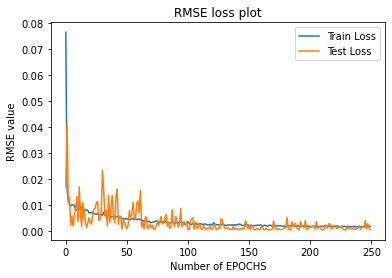

In [19]:
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.title('RMSE loss plot')
plt.xlabel('Number of EPOCHS')
plt.ylabel('RMSE value')
plt.legend()
plt.show()

In [20]:
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

In [21]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_test[0:,0], predicted[0:,0])))                                

10.925617118829669


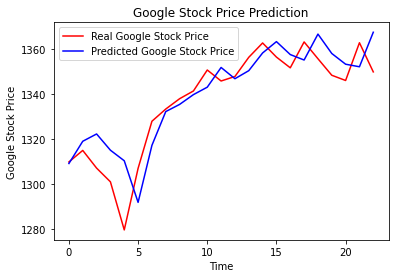

In [22]:
plt.plot(y_test[0:,0], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted[0:,0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()